<a href="https://colab.research.google.com/github/codefinite-vri/CodersWeek-ML/blob/master/Stock_Price_Prediction_NETFLIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STOCK PRICE PREDICTION**

A stock of a corporation signifies ownership in the corporation. A single share of the stock represents a claim on fractional assets and earnings of the corporation in proportion to the total number of shares. Stocks of a company can be traded between shareholders and other parties via stock exchanges and organizations. The prices which a stock is traded at fluctuate, essentially, due to the law of supply and demand.

Stock market prediction is the act of trying to determine the future value of a company stock or other financial instrument traded on a financial exchange. The successful prediction of a stock's future price will maximize investor's gains. 

This project is done using 2 Models to test which one works better:

1) Decision Tree Regression

2) Linear Regression

#IMPORTING LIBRARIES

In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

# WHERE DO I GET THE DATASET?

Select data you want from https://finance.yahoo.com/quote/ and save it as csv. I have selected data for NETFLIX Stocks from 11th June 2015 to 11th June 2020

# LOADING DATASET INTO COLAB

In [0]:
from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX (1).csv


# ANALYZING DATA

Storing data into dataframe

In [0]:
df=pd.read_csv('NFLX (1).csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-11,96.889999,96.918571,94.087143,95.094284,95.094284,26623100
1,2015-06-12,94.915718,95.342857,94.124283,94.418571,94.418571,10278800
2,2015-06-15,92.857140,93.591431,91.658569,93.431427,93.431427,19054000
3,2015-06-16,94.242859,95.607140,93.691429,95.272858,95.272858,16043300
4,2015-06-17,95.132858,95.132858,93.957146,94.271431,94.271431,9905000


Get the number of trading days

In [0]:
df.shape

(1259, 7)

Visualizing the close price data

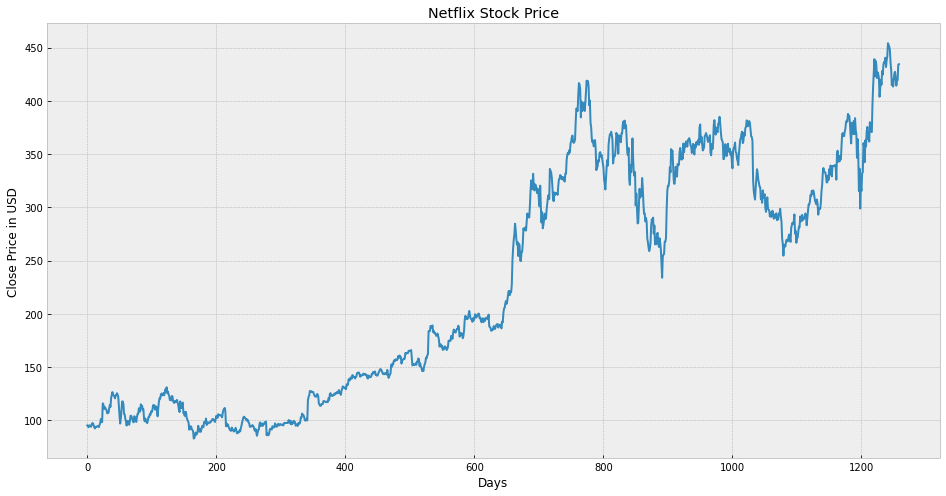

In [0]:
plt.figure(figsize=(16,8))
plt.title('Netflix Stock Price')
plt.xlabel('Days')
plt.ylabel('Close Price in USD')
plt.plot(df['Close'])
plt.show()

Get the close price

In [0]:
df=df[['Close']]
df.head(5)

,Close
0,95.094284
1,94.418571
2,93.431427
3,95.272858
4,94.271431


# PREPARATION FOR TRAINING

Create a variable to Predict 'x' days into the future

In [0]:
future_days = 50

Create a new column (target) shifted 'x' units up

In [0]:
df['Prediction']=df[['Close']].shift(-future_days)
df.head(5)

,Close,Prediction
0,95.094284,103.959999
1,94.418571,96.879997
2,93.431427,101.519997
3,95.272858,110.129997
4,94.271431,117.660004


In [0]:
df.tail(5)

,Close,Prediction
1254,414.329987,NaN
1255,419.600006,NaN
1256,419.489990,NaN
1257,434.049988,NaN
1258,434.480011,NaN


Create the feature data set(X) and convert it into a numpy array and remove last 'x' rows 

In [0]:
x=np.array(df.drop(['Prediction'],1))[:-future_days]
print(x)

[[ 95.094284]
 [ 94.418571]
 [ 93.431427]
 ...
 [362.98999 ]
 [357.119995]
 [370.959991]]


Create the target data set (y) and convert it to a numpy array and get all of the target values except last x rows

In [0]:
y = np.array(df['Prediction'])[:-future_days]
y

array([103.959999,  96.879997, 101.519997, ..., 419.48999 , 434.049988,
       434.480011])

# TRAINING AND TESTING

Split the data into 75% training and 25% testing

In [0]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25)

# Model Creation


1) Creating Decision Tree Regression Model

In [0]:
tree = DecisionTreeRegressor().fit(x_train, y_train)

2) Creating Linear Regression Model

In [0]:
lr = LinearRegression().fit(x_train, y_train)

# MODEL PREDICTION

Get the last x rows of the feature data set

In [0]:
x_future  = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[339.670013],
       [338.109985],
       [326.      ],
       [349.600006],
       [353.160004],
       [342.880005],
       [348.519989],
       [343.160004],
       [347.73999 ],
       [345.089996],
       [358.      ],
       [369.01001 ],
       [369.670013],
       [366.950012],
       [366.769989],
       [371.070007],
       [373.690002],
       [380.01001 ],
       [381.399994],
       [380.399994],
       [387.779999],
       [386.190002],
       [386.      ],
       [380.070007],
       [368.700012],
       [360.089996],
       [379.23999 ],
       [371.709991],
       [369.029999],
       [381.049988],
       [368.769989],
       [383.790009],
       [372.779999],
       [368.970001],
       [346.48999 ],
       [364.130005],
       [349.920013],
       [315.25    ],
       [336.299988],
       [298.839996],
       [319.75    ],
       [315.470001],
       [332.029999],
       [332.829987],
       [360.269989],
       [357.320007],
       [342.390015],
       [362.9

1) Show the model for Decision tree regression prediction

In [0]:
tree_prediction=tree.predict(x_future)
print(tree_prediction)

[375.5       364.079987  370.079987  354.9349975 379.959991  372.279999
 371.119995  310.829987  396.720001  413.549988  361.040009  439.170013
 422.959991  437.48999   433.829987  291.519989  426.700012  424.98999
 421.380005  294.290009  411.890015  419.850006  415.269989  428.149994
 424.679993  362.729996  436.529999  435.549988  440.519989  286.600006
 438.269989  341.179993  454.190002  452.579987  451.040009  374.130005
 436.25      429.320007  414.769989  419.890015  413.440002  419.730011
 425.920013  427.309998  421.970001  378.879995  419.600006  419.48999
 302.799988  434.480011 ]


2) Show the model for Linear Regression Prediction

In [0]:
lr_prediction=lr.predict(x_future)
print(lr_prediction)

[349.05599602 347.55743085 335.92456167 358.59476172 362.01450097
 352.139519   357.55729582 352.40848644 356.80802765 354.26243956
 366.66380816 377.24003976 377.8740396  375.26120269 375.08827234
 379.21887587 381.73564688 387.80665575 389.1418764  388.18127494
 395.27051847 393.74316504 393.56064884 387.86428895 376.94225523
 368.67146135 387.06697341 379.83364543 377.25924123 388.80566012
 377.00947524 391.43772828 380.86149667 377.20160706 355.60727583
 372.55229987 358.90216091 325.59809605 345.8187451  309.83462236
 329.92080259 325.80942933 341.71698747 342.4854571  368.84436289
 366.0106059  351.66883389 371.4571998  365.81847408 379.11319435]


# DATA VISUALIZATION

1) For Decision Tree Model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


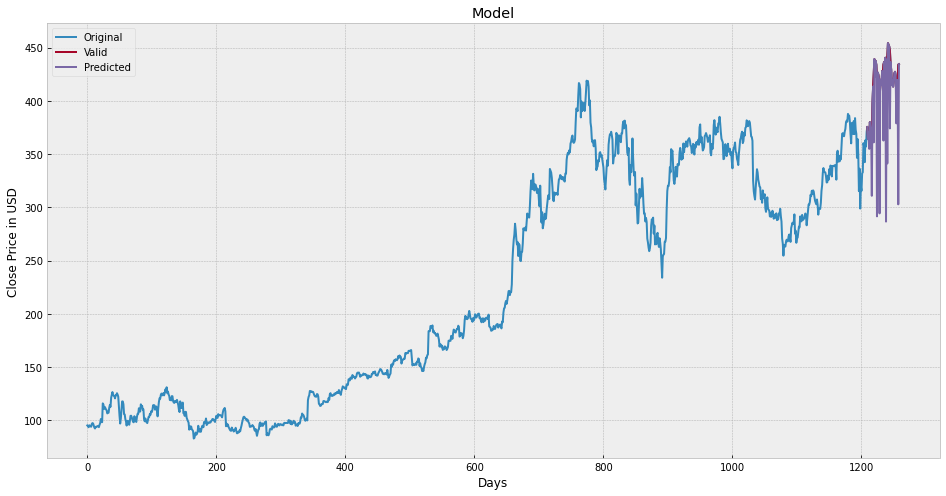

In [0]:
predictions = tree_prediction
valid=df[x.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price in USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original','Valid', 'Predicted'])
plt.show()

2) For Linear Regression Model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


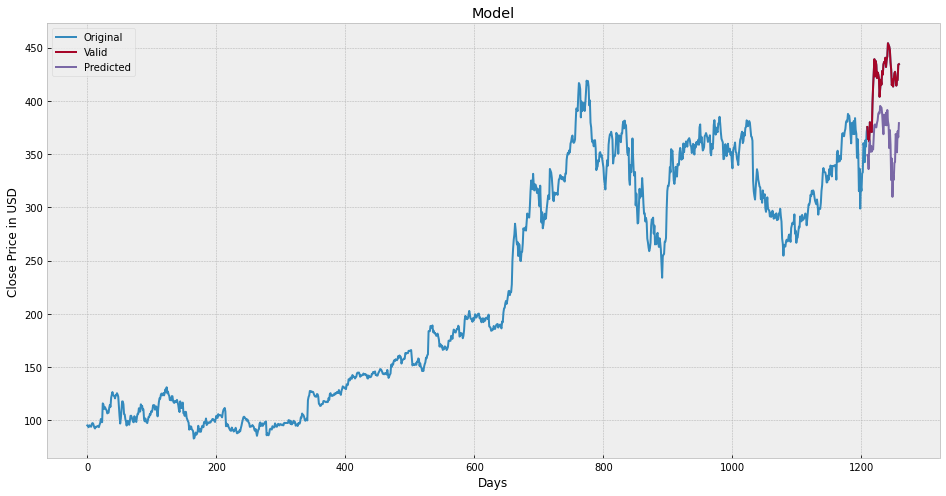

In [0]:
predictions = lr_prediction
valid=df[x.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price in USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original','Valid', 'Predicted'])
plt.show()

Thus, our Decision Tree Model could predict the Netflix Stocks better than the Linear Regression Model.